In [4]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt

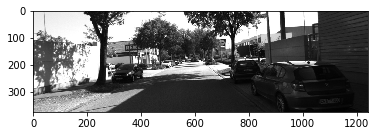

In [77]:
src_img = cv2.imread('assets/test2.jpg', 0)
plt.imshow(src_img, cmap='gray')

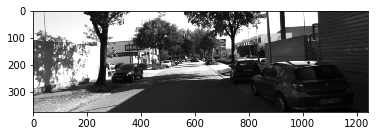

In [78]:
blur_gray = cv2.GaussianBlur(src_img,(3, 3), 0)
plt.imshow(blur_gray, cmap='gray')

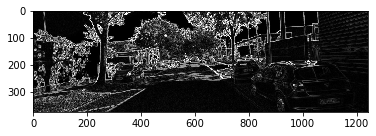

In [79]:
x = cv2.Sobel(src_img, cv2.CV_16S, 1, 0)
y = cv2.Sobel(src_img, cv2.CV_16S, 0, 1)

absX = cv2.convertScaleAbs(x)# 轉回uint8
absY = cv2.convertScaleAbs(y)
dst = cv2.addWeighted(absX, 0.5, absY, 0.5, 0)

plt.imshow(dst, cmap='gray')

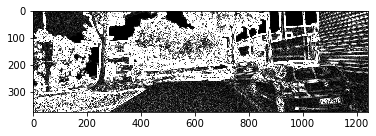

In [80]:
gray_lap = cv2.Laplacian(blur_gray, cv2.CV_16S, ksize=5)
dst = cv2.convertScaleAbs(gray_lap)
plt.imshow(dst, cmap='gray')

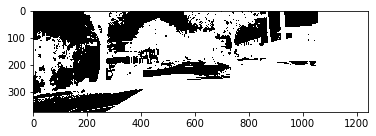

In [81]:
ret, thresh = cv2.threshold(blur_gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.imshow(thresh, cmap='gray')

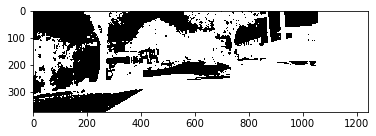

In [82]:
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN, kernel, iterations = 1)
plt.imshow(opening, cmap='gray')

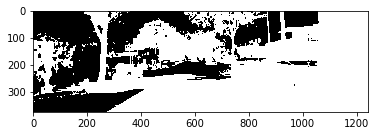

In [83]:
Erode_img=cv2.erode(thresh, kernel)
plt.imshow(Erode_img, cmap='gray')

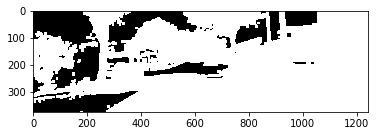

In [84]:
sure_bg = cv2.dilate(opening,kernel,iterations=3)
plt.imshow(sure_bg, cmap='gray')

In [ ]:
def Segment(src):
    hsv_img=cv2.cvtColor(src,cv2.COLOR_BGR2HSV)
    planes=cv2.split(hsv_img)
    planes[2]=cv2.equalizeHist(planes[2])
    mer_img=cv2.merge(planes)

    lower_red = np.array([100,48,40])
    upper_red = np.array([124,255,255])
    range_img=cv2.inRange(mer_img,lower_red,upper_red)

    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (10, 10))
    Erode_img=cv2.erode(range_img,kernel)
    Dilation_img = cv2.dilate(Erode_img, kernel)

    ret, mask = cv2.threshold(Dilation_img, 150, 255, cv2.THRESH_BINARY)
    notmask = cv2.bitwise_not(mask)
    frontpic = cv2.bitwise_and(src, src, mask=notmask)
    
    return frontpic

In [ ]:
src_img = cv2.imread('assets/test_image.jpg', 0)
plt.imshow(src_img, cmap='gray')
plt.show()

In [ ]:
blur_gray = cv2.GaussianBlur(src_img,(3, 3), 0)
plt.imshow(blur_gray, cmap='gray')

In [ ]:
canny = cv2.Canny(src_img,10,70)
plt.imshow(canny)

In [ ]:
hsv_img=cv2.cvtColor(src_img,cv2.COLOR_BGR2HSV)
plt.imshow(hsv_img[:, :, ::-1])

In [ ]:
planes=cv2.split(hsv_img)
planes[2]=cv2.equalizeHist(planes[2])
mer_img=cv2.merge(planes)
plt.imshow(mer_img[:, :, ::-1])
plt.show()

In [ ]:
lower_red = np.array([0,0,230])
upper_red = np.array([255,255,255])
range_img=cv2.inRange(mer_img,lower_red,upper_red)
plt.imshow(range_img, cmap='gray')
plt.show()

In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (10, 10))
Erode_img=cv2.erode(range_img,kernel)
plt.imshow(Erode_img, cmap='gray')
plt.show()

In [ ]:
Dilation_img = cv2.dilate(Erode_img, kernel)
plt.imshow(Dilation_img, cmap='gray')
plt.show()

In [ ]:
cv2.imshow('src',src_img)
cv2.imshow('mask',sky_mask)
cv2.waitKey()

# Test

In [1]:
import cv2

def combineImages(img1, img2):
    
    outImg = img1.copy()
    
    if len(img2.shape) < 3:
        img2 = cv2.cvtColor(img2, cv2.COLOR_GRAY2BGR)

    y0 = 0 
    y1 = outImg.shape[0]
    x0 = outImg.shape[1] / 2
    x1 = outImg.shape[1]
    
    outImg[y0:y1, x0:x1] = img2[y0:y1, x0:x1]

    return outImg

class App(object):
    def __init__(self):
        
        self.cannyLow = 71
        self.cannyHigh = 208
        self.morphKernSize = (9,9)
        self.threshVal = 140
        self.minPathLength = 400
        
        cv2.namedWindow("input")
        cv2.namedWindow("output")
        cv2.namedWindow("edge")

#         cv2.createTrackbar("cannyLow", "output", self.cannyLow, 1000, self.onSliderCannyLow)
#         cv2.createTrackbar("cannyHigh", "output", self.cannyHigh, 1000, self.onSliderCannyHigh)
        #cv2.createTrackbar("thresh", "output", self.threshVal, 255, self.onThreshSlider)
#         cv2.createTrackbar("morphKernSize", "output", self.morphKernSize[0], 255, self.onKernSlider)
#         cv2.createTrackbar("contourSlider", "output", self.minPathLength, 1000, self.onContourSlider)

        print("hello cvScope tester\n")

        #if len(sys.argv) > 2 :
        #    self.threshVal = int(sys.argv[1])
        #else:
        #    self.threshVal = 140

    def onSliderCannyLow(self, val):
        self.cannyLow = val

    def onSliderCannyHigh(self, val):
        self.cannyHigh = val

    def onKernSlider(self, val):
        if not val%2:
            val-=1
        self.morphKernSize = (val, val)

    def onContourSlider(self, val):
        self.minPathLength = val
    
    def onThreshSlider(self, val):
        self.threshVal = val

    def run(self, img):
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        #equalize histogram
        #gray = cv2.equalizeHist(gray)

        thresh = cv2.threshold(gray, self.threshVal, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
        edges = cv2.Canny(gray, self.cannyLow, self.cannyHigh)

        workImg = edges.copy()

        cv2.dilate(         edges,
                            cv2.getStructuringElement(cv2.MORPH_ELLIPSE,self.morphKernSize),
                            workImg,
                            (-1,-1),
                            2)
        cv2.morphologyEx(   thresh,
                            cv2.MORPH_CLOSE,
                            cv2.getStructuringElement(cv2.MORPH_ELLIPSE,self.morphKernSize),
                            thresh,
                            (-1,-1),
                            2)

        workImg |= thresh

        #Calculate blobs #cv2.RETR_EXTERNAL
        contours0, hierarchy = cv2.findContours(workImg.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
        #contours = [cv2.approxPolyDP(cnt, 3, True) for cnt in contours0]

        #sort out short contours
        longContours = []

        for cnt in contours0:
            if len(cnt) > self.minPathLength:
                longContours.append(cnt)  

        #create output image
        outImage = combineImages(img, edges)

        #(-1, 3)[levels <= 0]
        levels = 1
        cv2.drawContours( outImage, longContours, -1, (128,255,255), 
        3, cv2.CV_AA)
        #cv2.drawContours( outImage, longContours, -1, (128,255,255), 
        #3, cv2.CV_AA, hierarchy, abs(levels) )

        #show images
#         cv2.imshow("input", scaledImg)
#         cv2.imshow("output", outImage)
#         cv2.imshow("edge", thresh)
#         plt.imshow(scaledImg)
#         plt.imshow(outImage)
#         plt.imshow(thresh)
#         plt.show()

            
    
        #out="%.4d.jpg" % (i) 
        #cv2.imwrite(out, edges)
        #i=i+1
    
        

        print  ( "Values:\n\n"\
                "--> Canny: %d - %d\n"\
                "--> MorphKernSize: %s\n" %(self.cannyLow,self.cannyHigh,self.morphKernSize))
        return outImage, thresh


  
    

# Method 1 

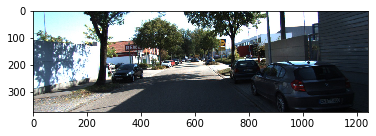

In [10]:
src_img = cv2.imread('assets/test2.jpg')
plt.imshow(src_img[:, :, ::-1])

In [8]:
gray = cv2.cvtColor(src_img, cv2.COLOR_BGR2GRAY)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))

thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
thresh_dilation = cv2.dilate(thresh, kernel, anchor=(-1,-1), iterations=8)

edges = cv2.Canny(gray, 1, 100)
edges_dilation = cv2.dilate(edges, kernel, anchor=(-1,-1), iterations=8)

mask = thresh_dilation | edges_dilation
mask_dilation = cv2.dilate(mask, kernel, anchor=(-1,-1), iterations=8)
segImg = 255 - mask_dilation 



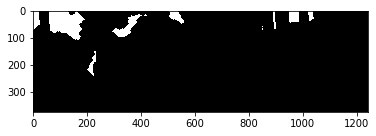

In [9]:
plt.imshow(segImg, cmap="gray")

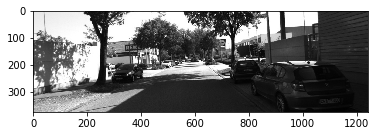

In [108]:
gray = cv2.cvtColor(src_img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap="gray")

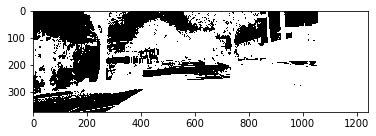

In [288]:
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
plt.imshow(thresh, cmap="gray")

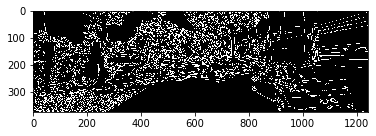

In [177]:
edges = cv2.Canny(gray, 1, 100)
plt.imshow(edges, cmap="gray")

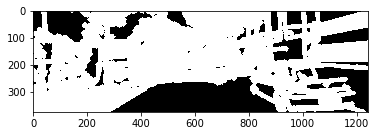

In [357]:
workImg = edges.copy()
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
cv2.dilate(edges, kernel, workImg, (-1,-1), 8)
plt.imshow(workImg, cmap="gray")

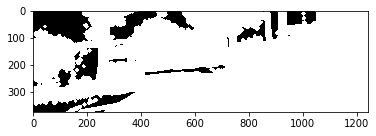

In [358]:
thresh_result = cv2.dilate(thresh, kernel, iterations=8)
plt.imshow(thresh_result, cmap="gray")

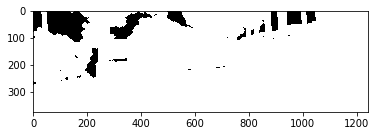

In [360]:
result = workImg | thresh_result
plt.imshow(result, cmap="gray")

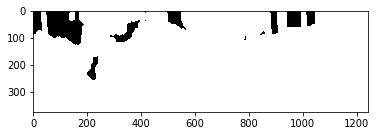

In [362]:
# result = cv2.morphologyEx(result,cv2.MORPH_CLOSE, (9,9), iterations = 10)
result = cv2.dilate(result, (9, 9), iterations=10)
plt.imshow(result, cmap='gray')

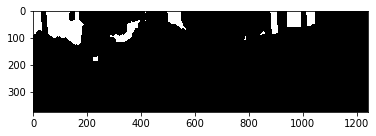

In [363]:
segImg = 255-result 
height = segImg.shape[0]
segImg[height//2:, :] = 0
plt.imshow(segImg, cmap='gray')

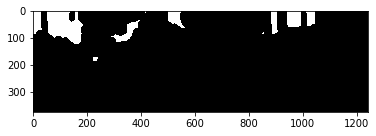

In [364]:
kernel = np.ones((3, 3), np.uint8)
erosion = cv2.erode(segImg, kernel, 10)
plt.imshow(erosion, cmap='gray')

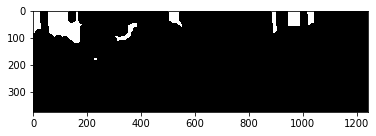

In [365]:
kernel = np.ones((9, 9), np.uint8)
erosion = cv2.erode(segImg, kernel, 10)
plt.imshow(erosion, cmap='gray')

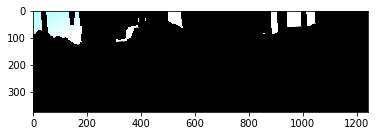

In [366]:
plt.imshow(src_img[:, :, ::-1])

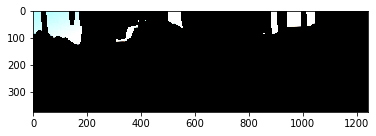

In [367]:
src_img[:, :, 0] = src_img[:, :, 0] & segImg
src_img[:, :, 1] = src_img[:, :, 1] & segImg
src_img[:, :, 2] = src_img[:, :, 2] & segImg
plt.imshow(src_img[:, :, ::-1])

In [2]:
import numpy as np
a = np.array([[2, 2], 
              [2, 2]])
b = np.array([[1, 3], 
              [2, 4]])
c = a * b
sum = c.sum()

20

# Method 2

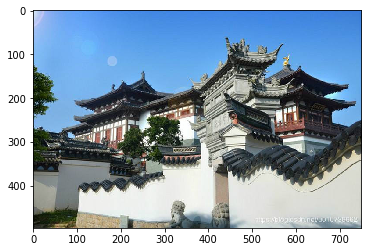

In [40]:
src_img = cv2.imread('assets/test.jpg')
plt.imshow(src_img[:, :, ::-1])

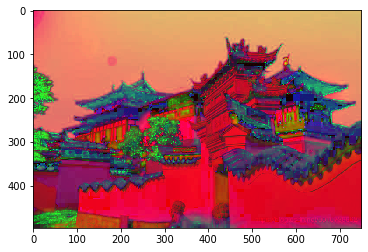

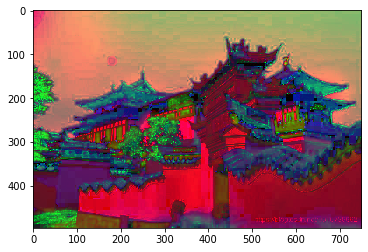

In [41]:
hsv_img=cv2.cvtColor(src_img,cv2.COLOR_BGR2HSV)
planes=cv2.split(hsv_img)
planes[2]=cv2.equalizeHist(planes[2])
mer_img=cv2.merge(planes)
plt.imshow(hsv_img[:, :, ::-1])
plt.show()
plt.imshow(mer_img[:, :, ::-1])
plt.show()

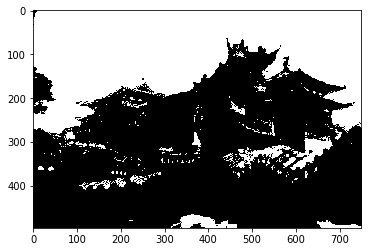

In [50]:
lower_red = np.array([77,43,40])
upper_red = np.array([124,255,255])
blue_img=cv2.inRange(mer_img,lower_red,upper_red)
plt.imshow(blue_img, cmap="gray")

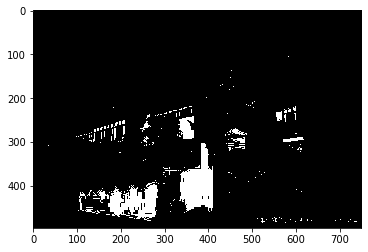

In [51]:
lower_red = np.array([0,0,221])
upper_red = np.array([180,30,255])
white_img=cv2.inRange(mer_img,lower_red,upper_red)
plt.imshow(white_img, cmap="gray")

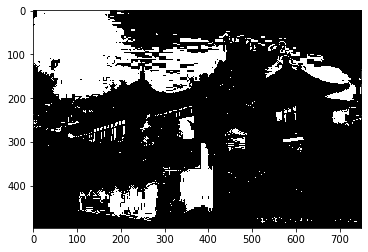

In [46]:
plt.imshow(white_img | blue_img, cmap="gray")

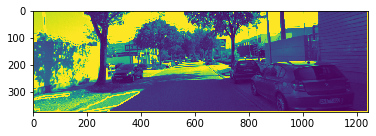

In [98]:
#Calculate blobs #cv2.RETR_EXTERNAL
contours0, hierarchy = cv2.findContours(result.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
#contours = [cv2.approxPolyDP(cnt, 3, True) for cnt in contours0]

#sort out short contours
longContours = []

for cnt in contours0:
    if len(cnt) > 400:
        longContours.append(cnt)  

#create output image
outImage = src_img.copy()

#(-1, 3)[levels <= 0]
levels = 1
cv2.drawContours( outImage, longContours, -1, (255,0,0), 
3, cv2.LINE_AA)
plt.imshow(outImage)

In [43]:
def combineImages(img1, img2):
    
    outImg = img1.copy()
    
    if len(img2.shape) < 3:
        img2 = cv2.cvtColor(img2, cv2.COLOR_GRAY2BGR)

    y0 = 0 
    y1 = outImg.shape[0]
    x0 = outImg.shape[1] // 2
    x1 = outImg.shape[1]
    
    outImg[y0:y1, x0:x1] = img2[y0:y1, x0:x1]

    return outImg